In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd

# 0. Prepare Data

In [2]:
os.chdir("/home/laiy/gitrepos/msr_final/LongTermEMG_myo")
from PrepareAndLoadData.process_data import read_data_training

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

In [4]:
read_data_training(path=data_dir, store_path = processed_data_dir, num_participant=5)

# 1. TSD_DNN

In [5]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_TSD_DNN_on_training_sessions, train_fine_tuning

In [6]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (3, 3, 40, 572, 252)
traning labels  (3, 3, 40, 572)


In [7]:
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycle_for_first_training=40               # #session
number_of_cycles_rest_of_training=40     
path_to_save_to="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/TSD"
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     # size of one example 
learning_rate=0.002515

In [8]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_to_save_to,
                  number_of_classes=number_of_classes,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 0)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one grou

train Loss: 0.00054783 Acc: 0.98095703
val Loss: 0.00036010 Acc: 0.96943231
Epoch 24 of 500 took 0.109s
Epoch 24/499
----------
train Loss: 0.00046562 Acc: 0.984375
val Loss: 0.00043158 Acc: 0.97379913
Epoch 25 of 500 took 0.105s
Epoch 25/499
----------
train Loss: 0.00048950 Acc: 0.98388672
val Loss: 0.00033015 Acc: 0.97379913
Epoch 26 of 500 took 0.113s

Training complete in 0m 3s
Best val loss: 0.000305
Session:  1
TSD_Network(
  (_network): ModuleList(
    (0): LinearBlocks(
      (fully_connected_1): Linear(in_features=252, out_features=200, bias=True)
      (batch_norm1): BatchNorm1d(200, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (relu1): LeakyReLU(negative_slope=0.1, inplace=True)
      (dropout1): Dropout(p=0.5, inplace=False)
      (net): Sequential(
        (0): Linear(in_features=252, out_features=200, bias=True)
        (1): BatchNorm1d(200, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.

train Loss: 0.00333842 Acc: 0.84277344
val Loss: 0.00096802 Acc: 0.89956332
New best validation loss: 0.0009680164563083232
Epoch 2 of 500 took 0.131s
Epoch 2/499
----------
train Loss: 0.00283507 Acc: 0.85888672
val Loss: 0.00100796 Acc: 0.91703057
Epoch 3 of 500 took 0.105s
Epoch 3/499
----------
train Loss: 0.00240521 Acc: 0.89355469
val Loss: 0.00070395 Acc: 0.93886463
New best validation loss: 0.0007039501156869413
Epoch 4 of 500 took 0.130s
Epoch 4/499
----------
train Loss: 0.00202812 Acc: 0.90820312
val Loss: 0.00050504 Acc: 0.9650655
New best validation loss: 0.0005050448285960734
Epoch 5 of 500 took 0.109s
Epoch 5/499
----------
train Loss: 0.00210064 Acc: 0.90478516
val Loss: 0.00044058 Acc: 0.97379913
Epoch 6 of 500 took 0.116s
Epoch 6/499
----------
train Loss: 0.00184191 Acc: 0.91748047
val Loss: 0.00035263 Acc: 0.96943231
New best validation loss: 0.0003526324333061818
Epoch 7 of 500 took 0.110s
Epoch 7/499
----------
train Loss: 0.00153126 Acc: 0.93164062
val Loss: 0.00

train Loss: 0.00110409 Acc: 0.95361328
val Loss: 0.00064366 Acc: 0.93449782
Epoch 16 of 500 took 0.204s
Epoch 16/499
----------
train Loss: 0.00111769 Acc: 0.95068359
val Loss: 0.00041353 Acc: 0.97379913
Epoch    17: reducing learning rate of group 0 to 5.0300e-04.
Epoch 17 of 500 took 0.134s
Epoch 17/499
----------
train Loss: 0.00109525 Acc: 0.95019531
val Loss: 0.00028006 Acc: 0.98689956
Epoch 18 of 500 took 0.122s
Epoch 18/499
----------
train Loss: 0.00093818 Acc: 0.96289062
val Loss: 0.00033950 Acc: 0.98253275
Epoch 19 of 500 took 0.112s
Epoch 19/499
----------
train Loss: 0.00081474 Acc: 0.96386719
val Loss: 0.00028660 Acc: 0.98253275
Epoch 20 of 500 took 0.109s
Epoch 20/499
----------
train Loss: 0.00084388 Acc: 0.96337891
val Loss: 0.00025552 Acc: 0.98689956
New best validation loss: 0.00025552317630255585
Epoch 21 of 500 took 0.107s
Epoch 21/499
----------
train Loss: 0.00076603 Acc: 0.96826172
val Loss: 0.00030940 Acc: 0.98253275
Epoch 22 of 500 took 0.127s
Epoch 22/499
----

train Loss: 0.00267559 Acc: 0.87792969
val Loss: 0.00068687 Acc: 0.93886463
New best validation loss: 0.0006868690252304077
Epoch 2 of 500 took 0.130s
Epoch 2/499
----------
train Loss: 0.00204821 Acc: 0.90332031
val Loss: 0.00051728 Acc: 0.94759825
New best validation loss: 0.000517277347989478
Epoch 3 of 500 took 0.130s
Epoch 3/499
----------
train Loss: 0.00178105 Acc: 0.91796875
val Loss: 0.00052111 Acc: 0.95633188
Epoch 4 of 500 took 0.134s
Epoch 4/499
----------
train Loss: 0.00164679 Acc: 0.92919922
val Loss: 0.00044844 Acc: 0.9650655
Epoch 5 of 500 took 0.132s
Epoch 5/499
----------
train Loss: 0.00139599 Acc: 0.93652344
val Loss: 0.00035753 Acc: 0.97379913
New best validation loss: 0.0003575307833575786
Epoch 6 of 500 took 0.136s
Epoch 6/499
----------
train Loss: 0.00137159 Acc: 0.93603516
val Loss: 0.00039772 Acc: 0.96943231
Epoch 7 of 500 took 0.131s
Epoch 7/499
----------
train Loss: 0.00125862 Acc: 0.94433594
val Loss: 0.00086649 Acc: 0.92576419
Epoch 8 of 500 took 0.132s

train Loss: 0.00149328 Acc: 0.93701172
val Loss: 0.00042755 Acc: 0.97379913
Epoch 19 of 500 took 0.145s
Epoch 19/499
----------
train Loss: 0.00153171 Acc: 0.93505859
val Loss: 0.00045890 Acc: 0.96943231
Epoch 20 of 500 took 0.160s
Epoch 20/499
----------
train Loss: 0.00157764 Acc: 0.93164062
val Loss: 0.00065497 Acc: 0.94323144
Epoch 21 of 500 took 0.143s
Epoch 21/499
----------
train Loss: 0.00142436 Acc: 0.94335938
val Loss: 0.00100738 Acc: 0.91266376
Epoch 22 of 500 took 0.182s
Epoch 22/499
----------
train Loss: 0.00163007 Acc: 0.93212891
val Loss: 0.00048055 Acc: 0.95196507
Epoch 23 of 500 took 0.124s
Epoch 23/499
----------
train Loss: 0.00162260 Acc: 0.92773438
val Loss: 0.00081787 Acc: 0.930131
Epoch 24 of 500 took 0.179s
Epoch 24/499
----------
train Loss: 0.00143067 Acc: 0.93847656
val Loss: 0.00045568 Acc: 0.96069869
Epoch    25: reducing learning rate of group 0 to 5.0300e-04.
Epoch 25 of 500 took 0.135s
Epoch 25/499
----------
train Loss: 0.00112000 Acc: 0.95166016
val L

train Loss: 0.00208847 Acc: 0.91455078
val Loss: 0.00064201 Acc: 0.94759825
Epoch 11 of 500 took 0.233s
Epoch 11/499
----------
train Loss: 0.00182647 Acc: 0.91650391
val Loss: 0.00068506 Acc: 0.94759825
Epoch 12 of 500 took 0.171s
Epoch 12/499
----------
train Loss: 0.00173598 Acc: 0.9296875
val Loss: 0.00037512 Acc: 0.96943231
New best validation loss: 0.0003751242069698317
Epoch 13 of 500 took 0.149s
Epoch 13/499
----------
train Loss: 0.00189191 Acc: 0.91845703
val Loss: 0.00101163 Acc: 0.92576419
Epoch 14 of 500 took 0.113s
Epoch 14/499
----------
train Loss: 0.00177416 Acc: 0.92333984
val Loss: 0.00047876 Acc: 0.95633188
Epoch 15 of 500 took 0.118s
Epoch 15/499
----------
train Loss: 0.00157206 Acc: 0.9296875
val Loss: 0.00069403 Acc: 0.93886463
Epoch 16 of 500 took 0.112s
Epoch 16/499
----------
train Loss: 0.00167832 Acc: 0.92871094
val Loss: 0.00029726 Acc: 0.97816594
Epoch 17 of 500 took 0.112s
Epoch 17/499
----------
train Loss: 0.00136877 Acc: 0.94189453
val Loss: 0.0004291

train Loss: 0.00234901 Acc: 0.87988281
val Loss: 0.00085479 Acc: 0.91266376
Epoch 16 of 500 took 0.116s
Epoch 16/499
----------
train Loss: 0.00224709 Acc: 0.89111328
val Loss: 0.00070635 Acc: 0.94759825
Epoch 17 of 500 took 0.126s
Epoch 17/499
----------
train Loss: 0.00207005 Acc: 0.90283203
val Loss: 0.00077290 Acc: 0.930131
Epoch 18 of 500 took 0.120s
Epoch 18/499
----------
train Loss: 0.00183066 Acc: 0.91162109
val Loss: 0.00063830 Acc: 0.94759825
Epoch 19 of 500 took 0.120s
Epoch 19/499
----------
train Loss: 0.00186108 Acc: 0.90917969
val Loss: 0.00066817 Acc: 0.94759825
Epoch 20 of 500 took 0.115s
Epoch 20/499
----------
train Loss: 0.00188589 Acc: 0.91601562
val Loss: 0.00070592 Acc: 0.94759825
Epoch 21 of 500 took 0.109s
Epoch 21/499
----------
train Loss: 0.00196766 Acc: 0.91015625
val Loss: 0.00089178 Acc: 0.90829694
Epoch 22 of 500 took 0.129s
Epoch 22/499
----------
train Loss: 0.00183956 Acc: 0.92138672
val Loss: 0.00049202 Acc: 0.96943231
New best validation loss: 0.00

In [9]:
save_path = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results_tsd"
algo_name = "standard_TSD"
test_TSD_DNN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_to_save_to,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_path, algo_name=algo_name,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2

In [10]:
results_filename = save_path + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(TSD_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(TSD_acc.shape[0])])
TSD_df

,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.438811,0.846154,0.646853
Session_2,0.494755,0.678322,0.522727


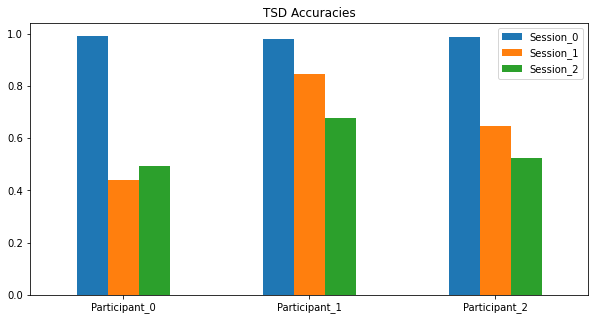

In [11]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

# 2. DANN

In [12]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [13]:
path_to_save_to_DANN = "Weights_TSD/DANN"
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycle_for_first_training=40               # #session
number_of_cycles_rest_of_training=40     
path_weights_standard_DNN =path_to_save_to
path_weights_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/DANN"
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     # size of one example 
learning_rate=0.002515

In [14]:
train_DANN(examples_datasets_train, labels_datasets_train, 
                      num_kernels=num_kernels,
                      path_weights_fine_tuning=path_weights_standard_DNN,
                      number_of_classes=number_of_classes,
                      number_of_cycle_for_first_training=number_of_cycle_for_first_training,
                      number_of_cycles_rest_of_training=number_of_cycles_rest_of_training,
                      batch_size=batch_size,
                      feature_vector_input_length=feature_vector_input_length,
                      path_weights_to_save_to=path_weights_DANN, learning_rate=learning_rate)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 0)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one grou

Accuracy source 0.944824, main loss classifier 0.157096, source classification loss 0.150953, loss domain distinction 0.304694, accuracy domain distinction 0.484375
VALIDATION Loss: 0.12409252 Acc: 0.93886463
New best validation loss:  0.12409251928329468
Epoch 1 of 500 took 0.227s
Accuracy source 0.943848, main loss classifier 0.161766, source classification loss 0.175100, loss domain distinction 0.189651, accuracy domain distinction 0.499512
VALIDATION Loss: 0.08118036 Acc: 0.9650655
New best validation loss:  0.08118036389350891
Epoch 2 of 500 took 0.236s
Accuracy source 0.943848, main loss classifier 0.154614, source classification loss 0.163991, loss domain distinction 0.186203, accuracy domain distinction 0.499756
VALIDATION Loss: 0.11574779 Acc: 0.95633188
Epoch 3 of 500 took 0.231s
Accuracy source 0.941406, main loss classifier 0.164624, source classification loss 0.186273, loss domain distinction 0.186113, accuracy domain distinction 0.500000
VALIDATION Loss: 0.13562109 Acc: 0

Accuracy source 0.967773, main loss classifier 0.129705, source classification loss 0.098891, loss domain distinction 0.464454, accuracy domain distinction 0.494629
VALIDATION Loss: 0.08133432 Acc: 0.96943231
New best validation loss:  0.08133431524038315
Epoch 1 of 500 took 0.236s
Accuracy source 0.969238, main loss classifier 0.119573, source classification loss 0.091813, loss domain distinction 0.222663, accuracy domain distinction 0.501953
VALIDATION Loss: 0.05185409 Acc: 0.97379913
New best validation loss:  0.05185409262776375
Epoch 2 of 500 took 0.225s
Accuracy source 0.971680, main loss classifier 0.121700, source classification loss 0.093574, loss domain distinction 0.197731, accuracy domain distinction 0.498779
VALIDATION Loss: 0.11210596 Acc: 0.95633188
Epoch 3 of 500 took 0.229s
Accuracy source 0.973145, main loss classifier 0.119155, source classification loss 0.089280, loss domain distinction 0.192085, accuracy domain distinction 0.499512
VALIDATION Loss: 0.10355277 Acc: 

Accuracy source 0.981445, main loss classifier 0.106095, source classification loss 0.069880, loss domain distinction 0.184385, accuracy domain distinction 0.500488
VALIDATION Loss: 0.10684148 Acc: 0.95633188
Epoch 11 of 500 took 0.230s
Accuracy source 0.975098, main loss classifier 0.111411, source classification loss 0.079265, loss domain distinction 0.187127, accuracy domain distinction 0.500244
VALIDATION Loss: 0.05542408 Acc: 0.97379913
Epoch 12 of 500 took 0.226s
Accuracy source 0.974121, main loss classifier 0.111049, source classification loss 0.079388, loss domain distinction 0.183833, accuracy domain distinction 0.499512
VALIDATION Loss: 0.04386269 Acc: 0.98253275
New best validation loss:  0.04386268928647041
Epoch 13 of 500 took 0.235s
Accuracy source 0.977539, main loss classifier 0.109238, source classification loss 0.075304, loss domain distinction 0.186249, accuracy domain distinction 0.500000
VALIDATION Loss: 0.05926291 Acc: 0.97816594
Epoch 14 of 500 took 0.225s
Accur

Accuracy source 0.963379, main loss classifier 0.128653, source classification loss 0.108307, loss domain distinction 0.250543, accuracy domain distinction 0.494141
VALIDATION Loss: 0.12713817 Acc: 0.95633188
Epoch 2 of 500 took 0.256s
Accuracy source 0.966309, main loss classifier 0.130952, source classification loss 0.112924, loss domain distinction 0.206607, accuracy domain distinction 0.498047
VALIDATION Loss: 0.06980500 Acc: 0.98253275
New best validation loss:  0.06980499625205994
Epoch 3 of 500 took 0.258s
Accuracy source 0.965332, main loss classifier 0.127527, source classification loss 0.106311, loss domain distinction 0.195708, accuracy domain distinction 0.500000
VALIDATION Loss: 0.05505801 Acc: 0.98689956
New best validation loss:  0.055058013647794724
Epoch 4 of 500 took 0.242s
Accuracy source 0.963379, main loss classifier 0.123043, source classification loss 0.099920, loss domain distinction 0.191558, accuracy domain distinction 0.499756
VALIDATION Loss: 0.13108055 Acc:

Accuracy source 0.977051, main loss classifier 0.111561, source classification loss 0.080764, loss domain distinction 0.185880, accuracy domain distinction 0.500488
VALIDATION Loss: 0.19848418 Acc: 0.92139738
Epoch 7 of 500 took 0.276s
Accuracy source 0.972656, main loss classifier 0.113694, source classification loss 0.084041, loss domain distinction 0.188889, accuracy domain distinction 0.500732
VALIDATION Loss: 0.24461025 Acc: 0.91266376
Epoch 8 of 500 took 0.236s
Accuracy source 0.973633, main loss classifier 0.109136, source classification loss 0.075846, loss domain distinction 0.188110, accuracy domain distinction 0.500244
VALIDATION Loss: 0.19218408 Acc: 0.930131
Epoch 9 of 500 took 0.231s
Accuracy source 0.968262, main loss classifier 0.121022, source classification loss 0.099235, loss domain distinction 0.188777, accuracy domain distinction 0.500244
VALIDATION Loss: 0.23471788 Acc: 0.90829694
Epoch 10 of 500 took 0.227s
Accuracy source 0.976562, main loss classifier 0.110140, 

In [15]:
save_path = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results_tsd"
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_weights_DANN,
                              algo_name=algo_name, save_path = save_path,
                              path_weights_normal=path_weights_standard_DNN, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2

In [16]:
results_filename = save_path + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(DANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(DANN_acc.shape[0])])
DANN_df

,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.596154,0.870629,0.725524
Session_2,0.520979,0.748252,0.561189


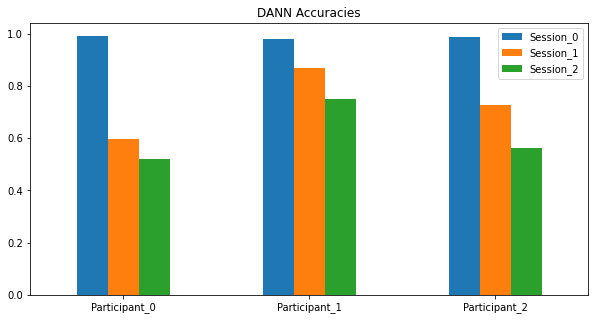

In [17]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

# 3. SCADANN

In [18]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import run_SCADANN_training_sessions, test_network_SLADANN

In [19]:
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycle_for_first_training=40               # #session
number_of_cycles_rest_of_training=40     
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     # size of one example 
learning_rate=0.002515
percentage_same_gesture_stable = 0.75 
path_weights_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/SCADANN"
path_weight_to_save_to = path_weights_SCADANN
path_weights_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/DANN"
path_weights_start_with = path_weights_DANN
path_weights_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/TSD"
path_weights_Normal_training = path_weights_TSD
algo_name = "SCADANN"

In [20]:
run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
                              num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
                              path_weights_to_save_to=path_weight_to_save_to,
                              path_weights_Adversarial_training=path_weights_start_with,
                              path_weights_Normal_training=path_weights_Normal_training,
                              number_of_cycle_for_first_training=40, number_of_cycles_rest_of_training=40,
                              number_of_classes=number_of_classes,
                              learning_rate=learning_rate)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
dataloaders: 
   train  (1, 3)
   valid  (0,)
   test  (1, 0)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  6
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.6666666666666666  len before:  26   len after:  15
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.4230769230769231   AFTER:  1.0  len before:  26   len after:  11
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after: 

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.779474, main loss classifier 0.821074, source accuracy 0.854403 source classification loss 0.452090, target accuracy 0.704545 target loss 0.955126 accuracy domain distinction 0.498935 loss domain distinction 1.174656,
VALIDATION Loss: 0.41208940 Acc: 0.84764543
New best validation loss:  0.41208940496047336
Epoch 2 of 500 took 0.320s
Accuracy total 0.827415, main loss classifier 0.623176, source accuracy 0.884233 source classification loss 0.345634, target accuracy 0.770597 target loss 0.674407 accuracy domain distinction 0.499645 loss domain distinction 1.131549,
VALIDATION Loss: 0.28781486 Acc: 0.88088643
New best validation loss:  0.2878148630261421
Epoch 3 of 500 took 0.289s
Accuracy total 0.860795, main loss classifier 0.536824, source accuracy 0.915483 source classification loss 0.258854, target accuracy 0.806108 target loss 0.591453 accuracy domain distinction 0.499645 loss domain distinction 1.116705,
VALIDATION Loss: 0.25924731 Acc: 0.92520776
New best validat

Accuracy total 0.959162, main loss classifier 0.248485, source accuracy 0.985795 source classification loss 0.070089, target accuracy 0.932528 target loss 0.218450 accuracy domain distinction 0.500000 loss domain distinction 1.042155,
VALIDATION Loss: 0.11220662 Acc: 0.96121884
Epoch 28 of 500 took 0.289s
Accuracy total 0.950284, main loss classifier 0.244478, source accuracy 0.976562 source classification loss 0.066202, target accuracy 0.924006 target loss 0.216219 accuracy domain distinction 0.500000 loss domain distinction 1.032672,
VALIDATION Loss: 0.11152857 Acc: 0.96398892
New best validation loss:  0.11152856796979904
Epoch 29 of 500 took 0.288s
Accuracy total 0.953125, main loss classifier 0.246119, source accuracy 0.978693 source classification loss 0.072853, target accuracy 0.927557 target loss 0.211581 accuracy domain distinction 0.500000 loss domain distinction 1.039020,
VALIDATION Loss: 0.12497542 Acc: 0.96121884
Epoch 30 of 500 took 0.289s
Accuracy total 0.951349, main lo

Accuracy total 0.966264, main loss classifier 0.208093, source accuracy 0.987926 source classification loss 0.049813, target accuracy 0.944602 target loss 0.159780 accuracy domain distinction 0.500000 loss domain distinction 1.032967,
VALIDATION Loss: 0.09925724 Acc: 0.96952909
Epoch 54 of 500 took 0.288s
Accuracy total 0.963068, main loss classifier 0.211643, source accuracy 0.983665 source classification loss 0.053053, target accuracy 0.942472 target loss 0.163192 accuracy domain distinction 0.500000 loss domain distinction 1.035203,
VALIDATION Loss: 0.11859609 Acc: 0.96121884
Epoch 55 of 500 took 0.290s
Accuracy total 0.965199, main loss classifier 0.210685, source accuracy 0.984375 source classification loss 0.054947, target accuracy 0.946023 target loss 0.161024 accuracy domain distinction 0.500000 loss domain distinction 1.026997,
VALIDATION Loss: 0.11571856 Acc: 0.96398892
Epoch 56 of 500 took 0.287s
Accuracy total 0.966619, main loss classifier 0.193480, source accuracy 0.98366

Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after:  1
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.15384615384615385   AFTER:  0.0  len before:  26   len after:  18
BEFORE:  0.3076923076923077   AFTER:  1.0  len before:  26   len after:  7
BEFORE:  0.5769230769230769   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.15384615384615385   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  4
BEFORE:  0.038461538461538464   A

Accuracy total 0.861753, main loss classifier 0.551136, source accuracy 0.889946 source classification loss 0.331121, target accuracy 0.833560 target loss 0.563140 accuracy domain distinction 0.500000 loss domain distinction 1.040052,
VALIDATION Loss: 0.31313784 Acc: 0.9047619
Epoch 8 of 500 took 0.304s
Accuracy total 0.868886, main loss classifier 0.507955, source accuracy 0.908288 source classification loss 0.285284, target accuracy 0.829484 target loss 0.525021 accuracy domain distinction 0.500000 loss domain distinction 1.028022,
VALIDATION Loss: 0.31368973 Acc: 0.88888889
Epoch 9 of 500 took 0.303s
Accuracy total 0.866508, main loss classifier 0.518680, source accuracy 0.904212 source classification loss 0.282142, target accuracy 0.828804 target loss 0.548371 accuracy domain distinction 0.500000 loss domain distinction 1.034233,
VALIDATION Loss: 0.25916544 Acc: 0.9047619
New best validation loss:  0.2591654360294342
Epoch 10 of 500 took 0.305s
Accuracy total 0.870584, main loss cl

Accuracy total 0.903193, main loss classifier 0.405298, source accuracy 0.928668 source classification loss 0.225025, target accuracy 0.877717 target loss 0.379600 accuracy domain distinction 0.500000 loss domain distinction 1.029860,
VALIDATION Loss: 0.19796951 Acc: 0.92592593
Epoch    33: reducing learning rate of group 0 to 4.0240e-06.
Epoch 34 of 500 took 0.302s
Accuracy total 0.900815, main loss classifier 0.417394, source accuracy 0.925951 source classification loss 0.221505, target accuracy 0.875679 target loss 0.407658 accuracy domain distinction 0.500000 loss domain distinction 1.028122,
VALIDATION Loss: 0.19390251 Acc: 0.92857143
Epoch 35 of 500 took 0.305s
Accuracy total 0.892663, main loss classifier 0.429473, source accuracy 0.916440 source classification loss 0.255856, target accuracy 0.868886 target loss 0.397451 accuracy domain distinction 0.500000 loss domain distinction 1.028199,
VALIDATION Loss: 0.20592755 Acc: 0.94179894
Epoch 36 of 500 took 0.302s
Accuracy total 0.

Accuracy total 0.920373, main loss classifier 0.358233, source accuracy 0.953726 source classification loss 0.142784, target accuracy 0.887019 target loss 0.336347 accuracy domain distinction 0.499399 loss domain distinction 1.186683,
VALIDATION Loss: 0.20694298 Acc: 0.92343387
New best validation loss:  0.2069429819072996
Epoch 2 of 500 took 0.340s
Accuracy total 0.931490, main loss classifier 0.323008, source accuracy 0.950120 source classification loss 0.152678, target accuracy 0.912861 target loss 0.265069 accuracy domain distinction 0.497897 loss domain distinction 1.141341,
VALIDATION Loss: 0.12131898 Acc: 0.95823666
New best validation loss:  0.12131898424455098
Epoch 3 of 500 took 0.342s
Accuracy total 0.938401, main loss classifier 0.303023, source accuracy 0.948317 source classification loss 0.141811, target accuracy 0.928486 target loss 0.244887 accuracy domain distinction 0.499099 loss domain distinction 1.096736,
VALIDATION Loss: 0.06477715 Acc: 0.97911833
New best validat

Accuracy total 0.970252, main loss classifier 0.192462, source accuracy 0.974760 source classification loss 0.079522, target accuracy 0.965745 target loss 0.099299 accuracy domain distinction 0.500000 loss domain distinction 1.030515,
VALIDATION Loss: 0.06217261 Acc: 0.97911833
Epoch 28 of 500 took 0.342s
Accuracy total 0.972356, main loss classifier 0.193411, source accuracy 0.980769 source classification loss 0.073090, target accuracy 0.963942 target loss 0.107903 accuracy domain distinction 0.500000 loss domain distinction 1.029147,
VALIDATION Loss: 0.07046738 Acc: 0.97679814
Epoch 29 of 500 took 0.338s
Accuracy total 0.974760, main loss classifier 0.192617, source accuracy 0.979567 source classification loss 0.065193, target accuracy 0.969952 target loss 0.113380 accuracy domain distinction 0.500000 loss domain distinction 1.033305,
VALIDATION Loss: 0.05430312 Acc: 0.98143852
Epoch 30 of 500 took 0.349s
Accuracy total 0.970553, main loss classifier 0.196538, source accuracy 0.97956

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  10
BEFORE:  0.46153846153846156   AFTER:  0.5  len before:  26   len after:  2
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  0.7  len before:  26   len after:  10
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.15384615384615385   AFTER:  0.0  len before:  26   len after:

Accuracy total 0.914363, main loss classifier 0.358542, source accuracy 0.927284 source classification loss 0.201752, target accuracy 0.901442 target loss 0.301729 accuracy domain distinction 0.499399 loss domain distinction 1.068017,
VALIDATION Loss: 0.08886771 Acc: 0.9736211
New best validation loss:  0.08886770930673395
Epoch 8 of 500 took 0.362s
Accuracy total 0.923077, main loss classifier 0.334834, source accuracy 0.935096 source classification loss 0.185062, target accuracy 0.911058 target loss 0.270852 accuracy domain distinction 0.500601 loss domain distinction 1.068769,
VALIDATION Loss: 0.08606160 Acc: 0.97122302
New best validation loss:  0.08606160112789699
Epoch 9 of 500 took 0.367s
Accuracy total 0.930288, main loss classifier 0.315346, source accuracy 0.941106 source classification loss 0.185704, target accuracy 0.919471 target loss 0.231991 accuracy domain distinction 0.499399 loss domain distinction 1.064984,
VALIDATION Loss: 0.12750430 Acc: 0.95443645
Epoch 10 of 500 

Accuracy total 0.884615, main loss classifier 0.521964, source accuracy 0.957332 source classification loss 0.120853, target accuracy 0.811899 target loss 0.679475 accuracy domain distinction 0.500601 loss domain distinction 1.218003,
VALIDATION Loss: 0.43621386 Acc: 0.87878788
New best validation loss:  0.43621385523251127
Epoch 2 of 500 took 0.342s
Accuracy total 0.894531, main loss classifier 0.468816, source accuracy 0.963942 source classification loss 0.124629, target accuracy 0.825120 target loss 0.584113 accuracy domain distinction 0.496394 loss domain distinction 1.144443,
VALIDATION Loss: 0.33192976 Acc: 0.91142191
New best validation loss:  0.33192976457732065
Epoch 3 of 500 took 0.395s
Accuracy total 0.903546, main loss classifier 0.415926, source accuracy 0.952524 source classification loss 0.127848, target accuracy 0.854567 target loss 0.481885 accuracy domain distinction 0.497897 loss domain distinction 1.110592,
VALIDATION Loss: 0.20676004 Acc: 0.93240093
New best valida

Accuracy total 0.926382, main loss classifier 0.330832, source accuracy 0.965745 source classification loss 0.108747, target accuracy 0.887019 target loss 0.341594 accuracy domain distinction 0.500000 loss domain distinction 1.056610,
VALIDATION Loss: 0.17362978 Acc: 0.93473193
Epoch 28 of 500 took 0.406s
Accuracy total 0.930288, main loss classifier 0.333538, source accuracy 0.970553 source classification loss 0.098024, target accuracy 0.890024 target loss 0.357295 accuracy domain distinction 0.499700 loss domain distinction 1.058785,
VALIDATION Loss: 0.28041397 Acc: 0.88811189
Epoch    28: reducing learning rate of group 0 to 4.0240e-06.
Epoch 29 of 500 took 0.389s
Accuracy total 0.928786, main loss classifier 0.320322, source accuracy 0.968149 source classification loss 0.103528, target accuracy 0.889423 target loss 0.327039 accuracy domain distinction 0.500000 loss domain distinction 1.050390,
VALIDATION Loss: 0.17554300 Acc: 0.94405594
Epoch 30 of 500 took 0.386s
Accuracy total 0.

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  6
BEFORE:  0.46153846153846156   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.38461538461538464   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:

Accuracy total 0.869375, main loss classifier 0.513832, source accuracy 0.900000 source classification loss 0.327084, target accuracy 0.838750 target loss 0.487276 accuracy domain distinction 0.500000 loss domain distinction 1.066525,
VALIDATION Loss: 0.33509152 Acc: 0.8960396
Epoch 6 of 500 took 0.380s
Accuracy total 0.863750, main loss classifier 0.508481, source accuracy 0.894375 source classification loss 0.316964, target accuracy 0.833125 target loss 0.487151 accuracy domain distinction 0.500000 loss domain distinction 1.064233,
VALIDATION Loss: 0.22589902 Acc: 0.90346535
New best validation loss:  0.2258990215403693
Epoch 7 of 500 took 0.405s
Accuracy total 0.876250, main loss classifier 0.485413, source accuracy 0.903750 source classification loss 0.292255, target accuracy 0.848750 target loss 0.465587 accuracy domain distinction 0.500000 loss domain distinction 1.064928,
VALIDATION Loss: 0.21823173 Acc: 0.92821782
New best validation loss:  0.21823173335620336
Epoch 8 of 500 to

Accuracy total 0.910000, main loss classifier 0.357932, source accuracy 0.924375 source classification loss 0.218885, target accuracy 0.895625 target loss 0.290972 accuracy domain distinction 0.500000 loss domain distinction 1.030034,
VALIDATION Loss: 0.20786103 Acc: 0.92821782
Epoch 32 of 500 took 0.380s
Accuracy total 0.911875, main loss classifier 0.361148, source accuracy 0.935000 source classification loss 0.211921, target accuracy 0.888750 target loss 0.303547 accuracy domain distinction 0.500000 loss domain distinction 1.034134,
VALIDATION Loss: 0.19786704 Acc: 0.92821782
Epoch 33 of 500 took 0.330s
Accuracy total 0.912500, main loss classifier 0.359376, source accuracy 0.933125 source classification loss 0.199815, target accuracy 0.891875 target loss 0.312727 accuracy domain distinction 0.500000 loss domain distinction 1.031050,
VALIDATION Loss: 0.21087738 Acc: 0.93316832
Epoch 34 of 500 took 0.329s
Training complete in 0m 12s
['participant_1', 'participant_2', 'participant_0']

In [21]:
save_path = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results_tsd"
test_network_SLADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_weight_to_save_to, path_weights_normal=path_weights_Normal_training,
                     algo_name=algo_name, cycle_test=3, 
                     number_of_classes=number_of_classes, save_path = save_path)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (2

In [22]:
results_filename = save_path + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(SCADANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(SCADANN_acc.shape[0])])
SCADANN_df

,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.608392,0.867133,0.736014
Session_2,0.526224,0.797203,0.617133


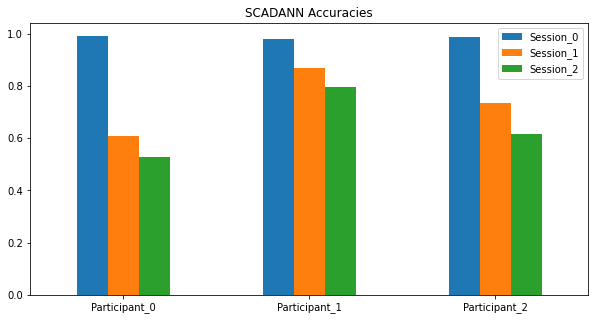

In [23]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

# Conclusion

In [24]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.438811,0.846154,0.646853
Session_2,0.494755,0.678322,0.522727


DANN


,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.596154,0.870629,0.725524
Session_2,0.520979,0.748252,0.561189


SCADANN


,Participant_0,Participant_1,Participant_2
Session_0,0.991259,0.980769,0.986014
Session_1,0.608392,0.867133,0.736014
Session_2,0.526224,0.797203,0.617133


In [25]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.731740
DANN,0.775641
SCADANN,0.790016


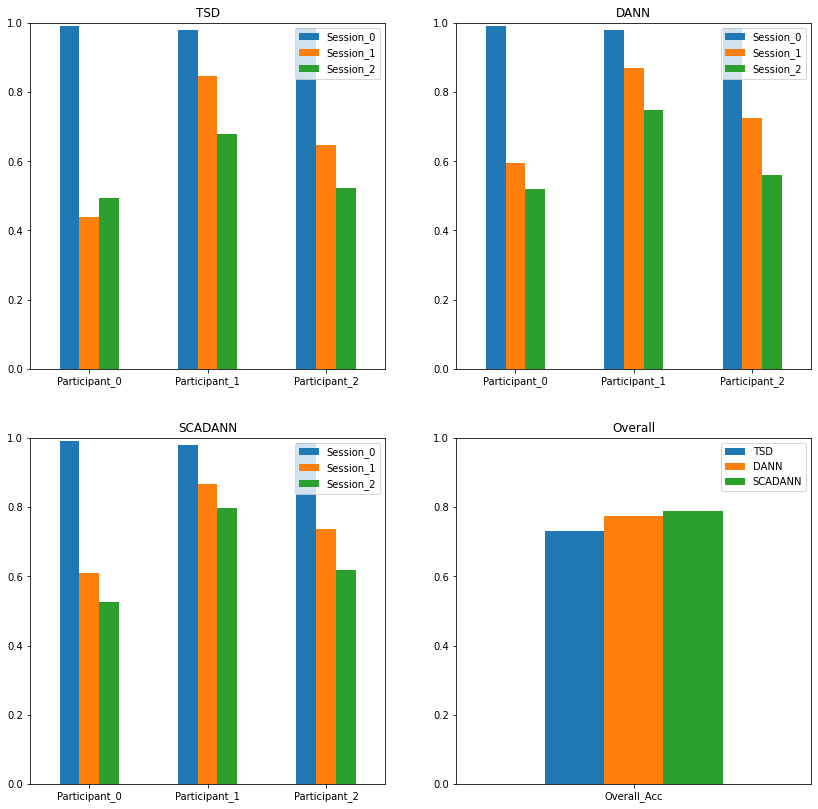

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])